In [1]:
# Chapter 8 Modeling and Prediction for Processes on Network Graphs

In [2]:
# 8.1 Introduction 

In [3]:
# 8.2 Nearest Neighbor Methods

In [4]:
set.seed(42)
library(sand)

Loading required package: igraph
Loading required package: igraphdata

Statistical Analysis of Network Data with R
Type in C2 (+ENTER) to start with Chapter 2.


In [5]:
data(ppi.CC)

In [6]:
summary(ppi.CC)

IGRAPH UN-- 134 241 -- 
attr: name (v/c), ICSC (v/n), IPR000198 (v/n), IPR000403 (v/n),
  IPR001806 (v/n), IPR001849 (v/n), IPR002041 (v/n), IPR003527 (v/n)


In [7]:
V(ppi.CC)$ICSC[1:10]

 [1] 1 1 1 1 1 0 1 1 1 1

In [8]:
V(ppi.CC)[ICSC == 1]$color <- "yellow"
V(ppi.CC)[ICSC == 0]$color <- "blue"

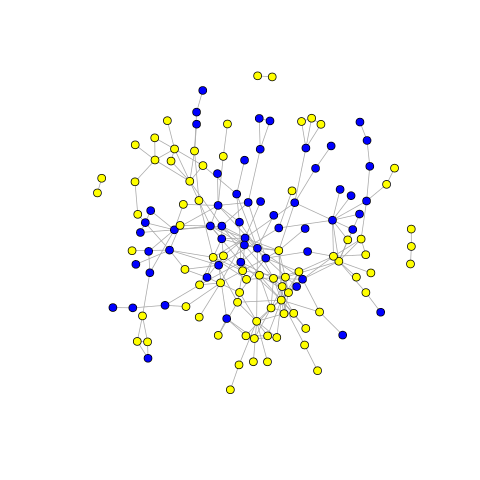

In [9]:
plot(ppi.CC, vertex.size=5, vertex.label=NA)

In [10]:
clu <- clusters(ppi.CC)

In [11]:
ppi.CC.gc <- induced.subgraph(ppi.CC, clu$membership==which.max(clu$csize))

In [12]:
nn.ave <- sapply(V(ppi.CC.gc), function(x) mean(V(ppi.CC.gc)[nei(x)]$ICSC))

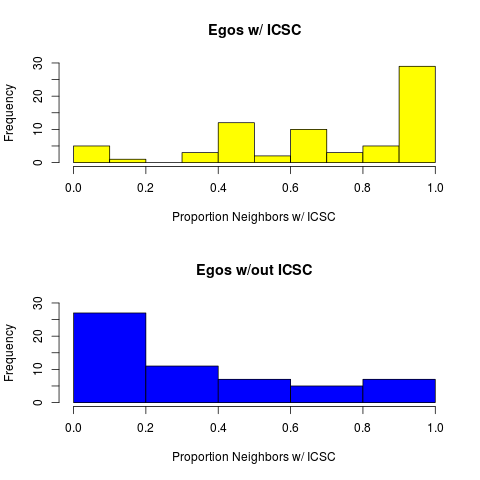

In [13]:
par(mfrow=c(2,1))
hist(nn.ave[V(ppi.CC.gc)$ICSC == 1], col="yellow", 
     ylim=c(0, 30), xlab="Proportion Neighbors w/ ICSC",
     main="Egos w/ ICSC")
hist(nn.ave[V(ppi.CC.gc)$ICSC == 0], col="blue",
     ylim=c(0, 30), xlab="Proportion Neighbors w/ ICSC",
     main="Egos w/out ICSC")

In [14]:
nn.pred <- as.numeric(nn.ave > 0.5)

In [15]:
mean(as.numeric(nn.pred != V(ppi.CC.gc)$ICSC))

[1] 0.2598425

In [16]:
# source("http://bioconductor.org/biocLite.R")
# biocLite("GOstats", suppressAutoUpdate=TRUE, suppressUpdates=TRUE)
library(GOstats)
library(GO.db)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, as.vector, cbind, colnames, do.call, duplicated,
    eval, evalq, get, intersect, is.unsorted, lapply, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, rank, rbind,
    rep.int, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unlist, unsplit

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
   

In [17]:
# biocLite("org.Sc.sgd.db", suppressAutoUpdate=TRUE, suppressUpdates=TRUE)
library(org.Sc.sgd.db)

In [18]:
x <- as.list(org.Sc.sgdGO2ALLORFS)
current.icst <- x[names(x) == "GO:0035556"]
ev.code <- names(current.icst[[1]])
icst.ida <- current.icst[[1]][ev.code == "IDA"]

ERROR: Error in as.list.default(org.Sc.sgdGO2ALLORFS): 본 S4 클래스를 벡터로 강제형변환하는 방법은 없습니다


ERROR: Error in eval(expr, envir, enclos): 객체 'x'를 찾을 수 없습니다


ERROR: Error in eval(expr, envir, enclos): 객체 'current.icst'를 찾을 수 없습니다


ERROR: Error in eval(expr, envir, enclos): 객체 'current.icst'를 찾을 수 없습니다


In [38]:
orig.icsc <- V(ppi.CC.gc)[ICSC == 1]$name

In [39]:
candidates <- intersect(icst.ida, V(ppi.CC.gc)$name)

ERROR: Error in as.vector(x): 객체 'icst.ida'를 찾을 수 없습니다
